<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana15/Metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm

In [3]:
def GetPlot():

  fig = plt.figure(figsize=(15,4))
  ax = fig.add_subplot(121)
  ax1 = fig.add_subplot(122)

  return ax,ax1

In [5]:
#GetPlot()

In [11]:
def Likelihood(x,p):
  mean,std = p
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mean)**2/(2*std**2))

In [37]:
def Metropolis(Likelihood,p,x0=-20,a=1,NSteps=int(100),burned=1000):

  x = np.zeros(NSteps)
  x[0] = x0

  for i in range(NSteps-1):

    # Donde estoy?
    p0 = Likelihood(x[i],p)

    # Doy un paso
    xn1 = x[i] + a*np.random.uniform(-1,1)

    # A donde me movi?
    p1 = Likelihood(xn1,p)

    # Probabilidad de aceptacion
    alpha = np.minimum(1, p1/p0)

    g = np.random.rand()

    if g < alpha:
      x[i+1] = xn1 # ME muevo
    else:
      x[i+1] = x[i]


  return x

In [38]:
p0 = np.array([4,2])
x = Metropolis(Likelihood,p0,a=2,NSteps=10000)

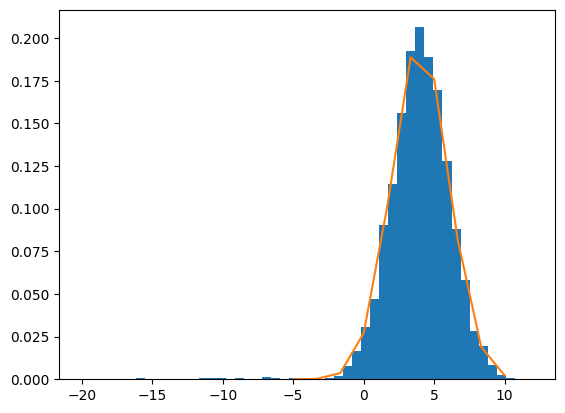

In [39]:
plt.hist(x,bins=50,density=True)
_x = np.linspace(-5,10,10)
_like = Likelihood(_x,p0)
plt.plot(_x,_like)

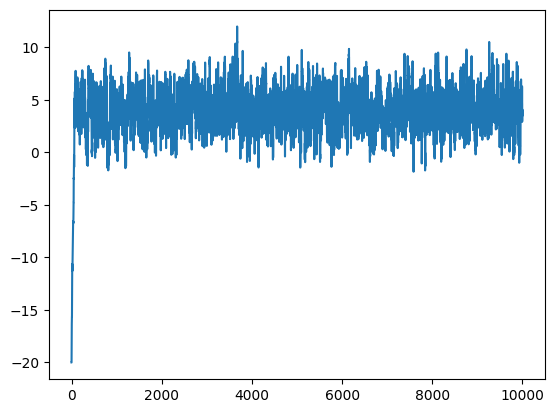

In [40]:
plt.plot(x)